In [1]:
import numpy as np
import pandas as pd

In [2]:
covid_data = pd.read_csv("WHO-COVID-19-global-data.csv")

In [3]:
ICD = covid_data[(covid_data["Country"] == "Latvia") | (covid_data["Country"] == "Estonia") | (covid_data["Country"] == "Lithuania")]
ICD.reset_index(drop=True, inplace = True)

ICD.head()
ICD_dropped = ICD.drop(["Country_code", "WHO_region"], axis = 1)
country_counts = ICD_dropped['Country'].value_counts()

In [4]:
energy_EE = pd.read_csv("estonia2018_2022.csv")
energy_LT = pd.read_csv("Lithunia2018_2022.csv")
energy_LV = pd.read_csv("latvia2018_2022.csv")

In [5]:
energy_EE["DateTime"] = pd.to_datetime(energy_EE["Period"], errors='coerce')
energy_EE.drop(["Period"], axis = 1, inplace = True)
energy_EE.head()

,Consumption,DateTime
0,829.7639,2018-01-01 00:00:00
1,815.4053,2018-01-01 01:00:00
2,786.5032,2018-01-01 02:00:00
3,780.0486,2018-01-01 03:00:00
4,778.6814,2018-01-01 04:00:00


In [6]:
energy_LT["DateTime"] = pd.to_datetime(energy_LT["Date"], errors='coerce')
energy_LT.drop(["Date"], axis = 1, inplace = True)
energy_LT.head()

,Consumption,DateTime
0,1139.95,2018-01-01 00:00:00
1,1101.76,2018-01-01 01:00:00
2,1051.43,2018-01-01 02:00:00
3,1012.91,2018-01-01 03:00:00
4,989.41,2018-01-01 04:00:00


In [7]:
energy_LV["DateTime"] = pd.to_datetime(energy_LV["DateTime"], errors='coerce')
energy_LV.head()

,DateTime,Consumption
0,2018-01-01 00:00:00,671.0
1,2018-01-01 01:00:00,659.0
2,2018-01-01 02:00:00,631.0
3,2018-01-01 03:00:00,612.0
4,2018-01-01 04:00:00,596.0


In [8]:
dc_EE = energy_EE.groupby(energy_EE['DateTime'].dt.date)['Consumption'].sum().reset_index()
dc_EE.rename(columns = {"DateTime" : "Date"}, inplace = True)
dc_EE["Date"] = pd.to_datetime(dc_EE["Date"], errors='coerce')

dc_EE.set_index('Date', inplace=True)
weekly_sum_EE = dc_EE.resample('W').sum()

weekly_sum_EE.head()

,Consumption
Date,
2018-01-07,169286.5881
2018-01-14,190721.2722
2018-01-21,201737.6826
2018-01-28,189070.2842
2018-02-04,186837.9225


In [9]:
dc_LT = energy_LT.groupby(energy_LT['DateTime'].dt.date)['Consumption'].sum().reset_index()
dc_LT.rename(columns = {"DateTime" : "Date"}, inplace = True)
dc_LT["Date"] = pd.to_datetime(dc_LT["Date"], errors='coerce')

dc_LT.set_index('Date', inplace=True)
weekly_sum_LT = dc_LT.resample('W').sum()

weekly_sum_LT.head()

,Consumption
Date,
2018-01-07,233098.11
2018-01-14,256354.84
2018-01-21,262044.67
2018-01-28,260927.97
2018-02-04,251129.51


In [10]:
dc_LV = energy_LV.groupby(energy_LV['DateTime'].dt.date)['Consumption'].sum().reset_index()
dc_LV.rename(columns = {"DateTime" : "Date"}, inplace = True)
dc_LV["Date"] = pd.to_datetime(dc_LV["Date"], errors='coerce')
dc_LV.set_index('Date', inplace=True)
weekly_sum_LV = dc_LV.resample('W').sum()

weekly_sum_LV.head()

,Consumption
Date,
2018-01-07,143167.0
2018-01-14,156984.0
2018-01-21,163167.0
2018-01-28,160573.0
2018-02-04,132545.0


In [11]:
ICD_dropped.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Estonia,0,0,0,0
1,2020-01-04,Estonia,0,0,0,0
2,2020-01-05,Estonia,0,0,0,0
3,2020-01-06,Estonia,0,0,0,0
4,2020-01-07,Estonia,0,0,0,0


In [12]:
ICD_dropped["Date_reported"] = pd.to_datetime(ICD_dropped["Date_reported"], errors='coerce')
ICD_dropped.head()


,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Estonia,0,0,0,0
1,2020-01-04,Estonia,0,0,0,0
2,2020-01-05,Estonia,0,0,0,0
3,2020-01-06,Estonia,0,0,0,0
4,2020-01-07,Estonia,0,0,0,0


In [13]:
unique_countries = ICD_dropped['Country'].unique()
ICD_dropped.rename(columns = {"Date_reported" : "Date"}, inplace = True)
Dataframe_dict = {}

for country in unique_countries:
    country_df = ICD_dropped[ICD_dropped['Country'] == country].copy()
    country_df.reset_index(inplace=True)
    country_df.set_index('Date', inplace=True)
    country_df_weeklysummed = country_df[["New_cases", "New_deaths"]].resample('W').sum()
    
    Dataframe_dict[country] = country_df_weeklysummed
#print(dfs_by_country)
CoVData_EE = Dataframe_dict['Estonia']
CoVData_LT = Dataframe_dict['Lithuania']
CoVData_LV = Dataframe_dict['Latvia']

In [14]:
CoVData_LV.head()

,New_cases,New_deaths
Date,,
2020-01-05,0,0
2020-01-12,0,0
2020-01-19,0,0
2020-01-26,0,0
2020-02-02,0,0


In [46]:
merged_data_EE = pd.merge(CoVData_EE, weekly_sum_EE, on='Date', how='inner')
merged_data_LT = pd.merge(CoVData_LT, weekly_sum_LT, on='Date', how='inner')
merged_data_LV = pd.merge(CoVData_LV, weekly_sum_LV, on='Date', how='inner')

In [47]:
merged_data_EE.reset_index(inplace=True)
merged_data_LT.reset_index(inplace=True)
merged_data_LV.reset_index(inplace=True)
merged_data_EE.head()

,Date,New_cases,New_deaths,Consumption
0,2020-01-05,0,0,159663.6
1,2020-01-12,0,0,177557.6
2,2020-01-19,0,0,175578.3
3,2020-01-26,0,0,176213.4
4,2020-02-02,0,0,177102.0


In [48]:
import matplotlib.pyplot as plt
def SimplePlotForCasesAndConsumption(df):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Line plot for Column1 on the left y-axis
    ax1.plot(df['Date'], df['New_cases'], label='New Cases', marker='o')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('New cases', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for Column2 on the right
    ax2 = ax1.twinx()
    ax2.plot(df['Date'], df['Consumption'], label='Consumption', marker='o', color='tab:red')
    ax2.set_ylabel('Consumption, MW', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Customize the plot
    plt.title('Dual Y-Axes Plot for New cases and Consumption Over Time')
    fig.tight_layout()
    plt.show()

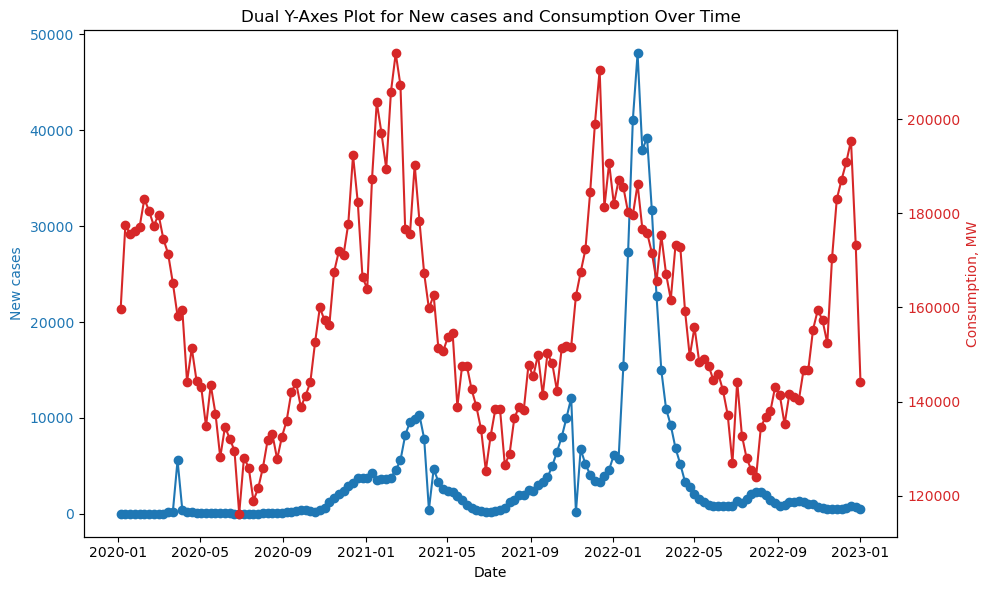

In [50]:
SimplePlotForCasesAndConsumption(merged_data_EE)

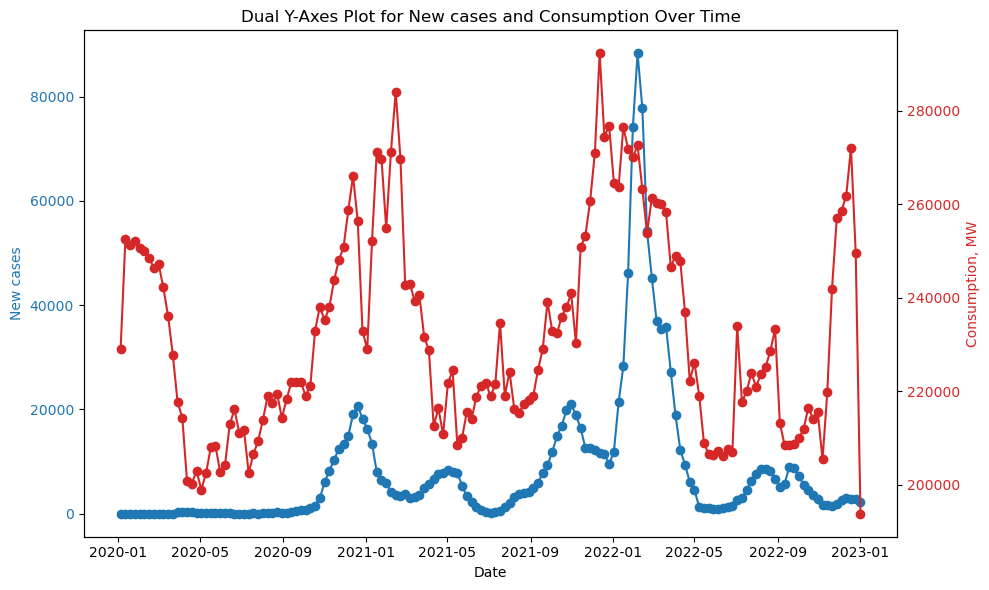

In [51]:
SimplePlotForCasesAndConsumption(merged_data_LT)

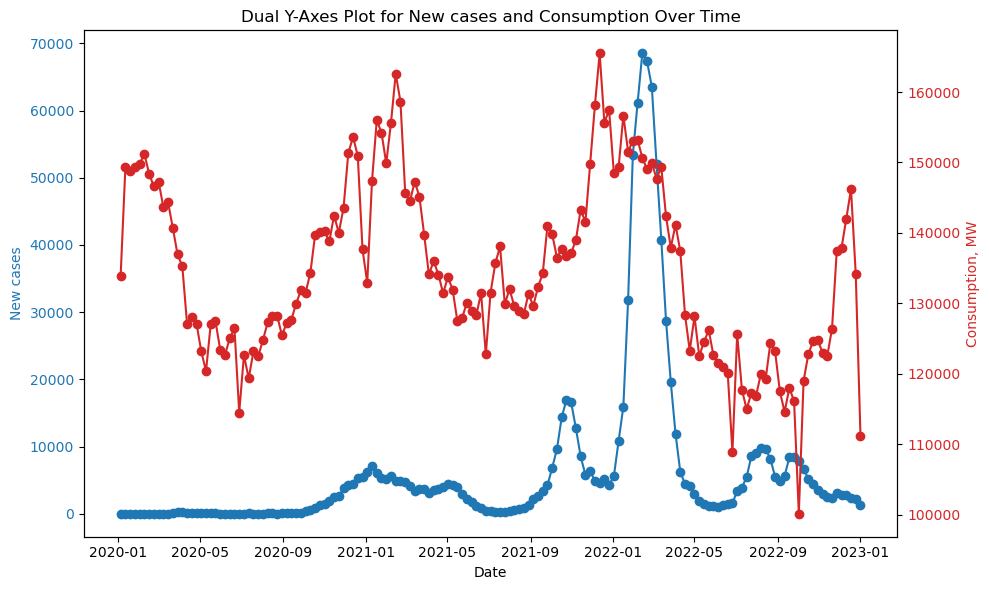

In [52]:
SimplePlotForCasesAndConsumption(merged_data_LV)

In [53]:
merged_data_EE.head()

,Date,New_cases,New_deaths,Consumption
0,2020-01-05,0,0,159663.6
1,2020-01-12,0,0,177557.6
2,2020-01-19,0,0,175578.3
3,2020-01-26,0,0,176213.4
4,2020-02-02,0,0,177102.0


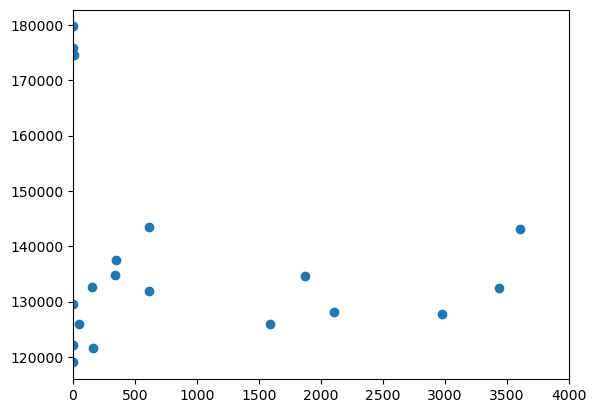

In [54]:
merged_data_EE2 = pd.DataFrame()
merged_data_EE2["New_cases"] = merged_data_EE["New_cases"]
merged_data_EE2["Avg_Consumption"] = merged_data_EE.groupby("New_cases")["Consumption"].mean()
plt.scatter(merged_data_EE2["New_cases"],merged_data_EE2["Avg_Consumption"])
plt.xlim(0,4000)


# Show the plot
plt.show()

In [78]:
merged_data_EE['Date'] = pd.to_datetime(merged_data_EE['Date'])

# Define a function to determine the season based on the month
def get_season(month):
    if 6 <= month <= 9:
        return 1
    else:
        return 2
#merged_data_EE['Year'] = merged_data_EE['Date'].dt.year
#merged_data_EE['Month'] = merged_data_EE['Date'].dt.month
#monthly_averages = merged_data_EE.groupby(['Year', 'Month'])["Consumption", "New_cases"].mean()
# Add a 'Season' column to the DataFrame
merged_data_EE['Season'] = merged_data_EE['Date'].dt.month.map(get_season)
print(merged_data_EE)
merged_data_EE['Year'] = merged_data_EE['Date'].dt.year
merged_data_EE['Month'] = merged_data_EE['Date'].dt.month
monthly_averages = merged_data_EE.groupby(['Year', 'Month'])[["Consumption", "New_cases", "Season"]].mean()

# Display the resulting DataFrame

monthly_averages.head()

          Date  New_cases  New_deaths  Consumption  Year  Month  Season
0   2020-01-05          0           0     159663.6  2020      1       2
1   2020-01-12          0           0     177557.6  2020      1       2
2   2020-01-19          0           0     175578.3  2020      1       2
3   2020-01-26          0           0     176213.4  2020      1       2
4   2020-02-02          0           0     177102.0  2020      2       2
..         ...        ...         ...          ...   ...    ...     ...
152 2022-12-04        536           9     187079.8  2022     12       2
153 2022-12-11        624          15     190826.2  2022     12       2
154 2022-12-18        819          23     195421.1  2022     12       2
155 2022-12-25        681          17     173285.0  2022     12       2
156 2023-01-01        541          19     144176.8  2023      1       2

[157 rows x 7 columns]


Consumption  New_cases  Season
Year Month                                
2020 1      172253.2250       0.00     2.0
     2      179495.8000       0.00     2.0
     3      169839.8694    1191.00     2.0
     4      149907.2250     233.75     2.0
     5      137392.0000      44.40     2.0

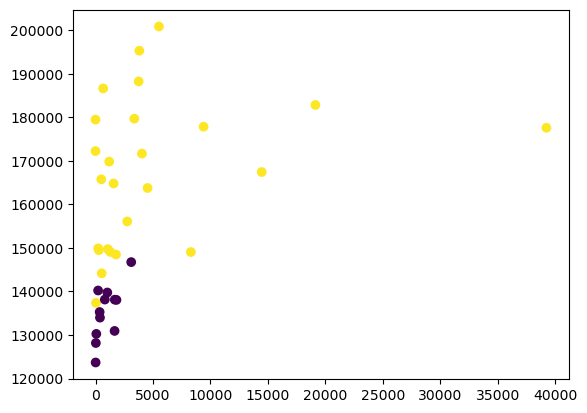

In [82]:
plt.scatter(monthly_averages["New_cases"],monthly_averages["Consumption"], c = monthly_averages["Season"],cmap='viridis', label='Dots')
#plt.xlim(0,10000)


# Show the plot
plt.show()